<a href="https://colab.research.google.com/github/arpanbiswas52/pcVAEBO_pyrochlore/blob/main/data/pc_VAE_PerformanceComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install typing-extensions>=4.8.0
#!pip install numpy==1.22.0
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader # Import TensorDataset and DataLoader

In [ ]:
data = pd.read_csv("cleaned_training_df.csv") # The data file is shared in the google drive link provided in ReadMe

In [ ]:
data.head()

,hklf^2_1,hklf^2_10,hklf^2_100,hklf^2_1000,hklf^2_10000,hklf^2_10001,hklf^2_10002,hklf^2_10003,hklf^2_10004,hklf^2_10005,...,hklf^2_9990,hklf^2_9991,hklf^2_9992,hklf^2_9993,hklf^2_9994,hklf^2_9995,hklf^2_9996,hklf^2_9997,hklf^2_9998,hklf^2_9999
0,5.005193e-31,8.507769e-28,1.493190e-27,0.000000e+00,0.000000e+00,0.000000e+00,5.832943e-28,5.482709e-31,1.782625e-30,4.444791e-27,...,2.014956e-30,8.065244e-28,1.199850e-27,0.000000e+00,7.067603e-27,5.105906e-28,2.777678e-28,5.105111e-28,1.342770e-27,8.090890e-27
1,5.005193e-31,8.507769e-28,1.493190e-27,0.000000e+00,0.000000e+00,0.000000e+00,5.832943e-28,5.482709e-31,1.782625e-30,4.444791e-27,...,2.014956e-30,8.065244e-28,1.199850e-27,0.000000e+00,7.067603e-27,5.105906e-28,2.777678e-28,5.105111e-28,1.342770e-27,8.090890e-27
2,7.389748e+05,2.419605e+06,1.446993e+06,2.548810e+06,1.684532e+06,2.031928e+06,7.454746e+05,6.384517e+05,1.655092e+06,1.916591e+06,...,1.634486e+06,2.094725e+06,1.084284e+06,1.309885e+06,1.830220e+06,1.667130e+06,1.313157e+06,1.785104e+06,2.941170e+06,4.227876e+06
3,7.389748e+05,2.419605e+06,1.446993e+06,2.548810e+06,1.684532e+06,2.031928e+06,7.454746e+05,6.384517e+05,1.655092e+06,1.916591e+06,...,1.634486e+06,2.094725e+06,1.084284e+06,1.309885e+06,1.830220e+06,1.667130e+06,1.313157e+06,1.785104e+06,2.941170e+06,4.227876e+06
4,5.005193e-31,8.507769e-26,5.968391e-27,3.392270e-26,8.747726e-26,2.232385e-26,1.311132e-27,8.983419e-27,6.035435e-26,1.493295e-26,...,1.044553e-26,2.430243e-26,2.999743e-26,1.629938e-26,1.335893e-26,2.492159e-26,2.766870e-26,1.033984e-26,8.560292e-26,5.056806e-26


In [ ]:
data.shape

(2596, 25000)

In [ ]:
## SCALING FUNCTION
def custom_minmax_normalization(df, max_row_index):

    # Extract the row with the custom maximum values
    hkl_222_val = df.loc[max_row_index]

    # Apply the Min-Max normalization formula
    normalized_df = (df) / (hkl_222_val)

    return normalized_df*1000

In [ ]:
# SCALING AT hkl 222
max_row_index = 452

data = custom_minmax_normalization(data, max_row_index)
data.head()

,hklf^2_1,hklf^2_10,hklf^2_100,hklf^2_1000,hklf^2_10000,hklf^2_10001,hklf^2_10002,hklf^2_10003,hklf^2_10004,hklf^2_10005,...,hklf^2_9990,hklf^2_9991,hklf^2_9992,hklf^2_9993,hklf^2_9994,hklf^2_9995,hklf^2_9996,hklf^2_9997,hklf^2_9998,hklf^2_9999
0,4.807522e-34,1.965151e-31,7.044796e-31,0.000000e+00,0.000000e+00,0.000000e+00,4.946336e-31,5.988224e-34,6.964269e-34,1.507845e-30,...,7.638583e-34,2.269613e-31,7.250412e-31,0.000000e+00,2.423799e-30,1.598653e-31,1.310149e-31,1.879091e-31,2.682581e-31,1.153293e-30
1,4.807522e-34,1.965151e-31,7.044796e-31,0.000000e+00,0.000000e+00,0.000000e+00,4.946336e-31,5.988224e-34,6.964269e-34,1.507845e-30,...,7.638583e-34,2.269613e-31,7.250412e-31,0.000000e+00,2.423799e-30,1.598653e-31,1.310149e-31,1.879091e-31,2.682581e-31,1.153293e-30
2,7.097902e+02,5.588880e+02,6.826838e+02,5.538181e+02,4.159226e+02,6.766821e+02,6.321625e+02,6.973181e+02,6.466029e+02,6.501817e+02,...,6.196244e+02,5.894694e+02,6.552074e+02,5.957715e+02,6.276648e+02,5.219765e+02,6.193771e+02,6.570614e+02,5.875856e+02,6.026509e+02
3,7.097902e+02,5.588880e+02,6.826838e+02,5.538181e+02,4.159226e+02,6.766821e+02,6.321625e+02,6.973181e+02,6.466029e+02,6.501817e+02,...,6.196244e+02,5.894694e+02,6.552074e+02,5.957715e+02,6.276648e+02,5.219765e+02,6.193771e+02,6.570614e+02,5.875856e+02,6.026509e+02
4,4.807522e-34,1.965151e-29,2.815856e-30,7.370892e-30,2.159874e-29,7.434392e-30,1.111840e-30,9.811706e-30,2.357893e-29,5.065834e-30,...,3.959842e-30,6.838866e-30,1.812674e-29,7.413405e-30,4.581376e-30,7.802921e-30,1.305051e-29,3.805893e-30,1.710171e-29,7.208083e-30


In [ ]:
data.iloc[452]

hklf^2_1        1000.0
hklf^2_10       1000.0
hklf^2_100      1000.0
hklf^2_1000     1000.0
hklf^2_10000    1000.0
                 ...  
hklf^2_9995     1000.0
hklf^2_9996     1000.0
hklf^2_9997     1000.0
hklf^2_9998     1000.0
hklf^2_9999     1000.0
Name: 452, Length: 25000, dtype: float64

## CONVERTING DATA TO TENSOR

In [ ]:
data = data.transpose()

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595
hklf^2_1,4.807522e-34,4.807522e-34,709.790249,709.790249,4.807522e-34,4.807522e-34,337.850903,337.850903,0.000000e+00,0.000000e+00,...,0.004233,20.745455,20.745455,4.692194,4.692194,4.692194,4.202536,4.202536,4.202536,4.202536
hklf^2_10,1.965151e-31,1.965151e-31,558.888041,558.888041,1.965151e-29,1.965151e-29,147.247241,147.247241,1.504569e-31,1.504569e-31,...,0.039039,0.337684,0.337684,0.004003,0.004003,0.004003,0.015856,0.015856,0.015856,0.015856
hklf^2_100,7.044796e-31,7.044796e-31,682.683850,682.683850,2.815856e-30,2.815856e-30,346.148773,346.148773,1.116858e-32,1.116858e-32,...,0.071867,10.477544,10.477544,0.084504,0.084504,0.084504,0.167663,0.167663,0.167663,0.167663
hklf^2_1000,0.000000e+00,0.000000e+00,553.818108,553.818108,7.370892e-30,7.370892e-30,126.511955,126.511955,6.814646e-32,6.814646e-32,...,0.041642,0.335618,0.335618,0.004101,0.004101,0.004101,0.045949,0.045949,0.045949,0.045949
hklf^2_10000,0.000000e+00,0.000000e+00,415.922611,415.922611,2.159874e-29,2.159874e-29,162.465198,162.465198,6.000301e-31,6.000301e-31,...,0.989091,0.325290,0.325290,0.435694,0.435694,0.435694,0.085161,0.085161,0.085161,0.085161


In [ ]:
data.shape

(25000, 2596)

In [ ]:
# Convert the Pandas DataFrame to a PyTorch tensor
data_tensor = torch.tensor(data.values, dtype=torch.float32)

# Create a TensorDataset using the data tensor
dataset = TensorDataset(data_tensor) # Use TensorDataset directly from torch.utils.data

# Create a DataLoader for the dataset
data_loader = DataLoader(dataset, batch_size=64, shuffle=False) # Use DataLoader directly from torch.utils.data

# VAE: FINDING THE OPTIMAL LATENT DIMENSION

In [ ]:
# Define the Variational Autoencoder (VAE) architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1000),
            nn.ReLU(),
            nn.Linear(1000, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)  # Clamp to prevent large values
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Define loss function (Reconstruction Loss using MSE + KL Divergence)
def loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# Initialize weights with Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

# Function to train the VAE
def train_vae(vae, dataloader, epochs=100, lr=0.0001):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    vae.train()

    for epoch in range(epochs):
        train_loss = 0
        for batch in dataloader:
            batch_data = batch[0]
            optimizer.zero_grad()
            reconstructed, mu, logvar = vae(batch_data)
            loss = loss_function(reconstructed, batch_data, mu, logvar)

            # Check for NaN or Inf loss
            if torch.isnan(loss) or torch.isinf(loss):
                print("NaN or Inf loss encountered, stopping training.")
                return

            loss.backward()
            torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)  # Clip gradients
            optimizer.step()
            train_loss += loss.item()

        avg_loss = train_loss / len(dataloader.dataset)
        print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

# Function to calculate the Mean Absolute Error (MAE) for reconstruction
def calculate_mae(vae, data_loader):
    vae.eval()
    original_data = []
    reconstructed_data = []

    with torch.no_grad():
        for batch in data_loader:
            batch_data = batch[0]
            reconstructed, _, _ = vae(batch_data)
            original_data.append(batch_data)
            reconstructed_data.append(reconstructed)

    original_data = torch.cat(original_data).numpy()
    reconstructed_data = torch.cat(reconstructed_data).numpy()

    mae = np.mean(np.abs(original_data - reconstructed_data))  # Mean Absolute Error
    return mae

# Loop over different latent dimensions, train the VAE, and calculate MAE
latent_dims = range(2, 11)  # Latent dimensions from 2 to 10
mae_values = []

for latent_dim in latent_dims:
    print(f"Training VAE with latent dimension: {latent_dim}")
    vae = VAE(input_dim=data.shape[1], latent_dim=latent_dim)
    vae.apply(init_weights)  # Apply Xavier initialization

    # Train the VAE
    train_vae(vae, data_loader, epochs=100, lr=0.0001)

    # Calculate MAE
    mae = calculate_mae(vae, data_loader)
    mae_values.append(mae)
    print(f"Latent Dimension {latent_dim}, MAE: {mae:.4f}")

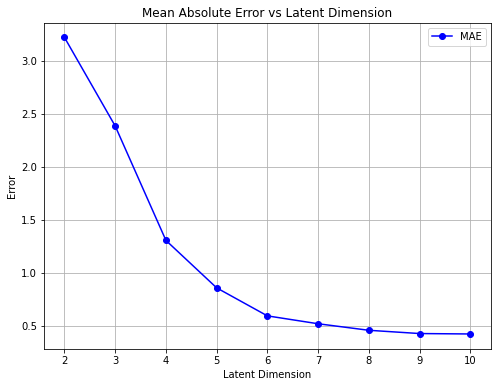

In [ ]:
# Plot of Mean Absolute Error (MAE) vs Latent Dimension
plt.figure(figsize=(8, 6))
plt.plot(latent_dims, mae_values, marker='o', color='b', label='MAE')
plt.title('Mean Absolute Error vs Latent Dimension')
plt.xlabel('Latent Dimension')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# FINDING THE OPTIMAL LEARNING RATE

In [ ]:
# Define the Variational Autoencoder (VAE) architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1000),
            nn.ReLU(),
            nn.Linear(1000, input_dim),
            nn.ReLU()  # To enforce non-negative reconstruction values
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Define loss function (Reconstruction Loss + KL Divergence)
def loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# Train the VAE for each learning rate and collect reconstruction errors
def train_and_evaluate_vae(vae, dataloader, learning_rates, epochs=200):
    reconstruction_errors = {}  # Store reconstruction error for each learning rate

    for lr in learning_rates:
        optimizer = optim.Adam(vae.parameters(), lr=lr)
        vae.apply(init_weights)  # Reinitialize weights for each learning rate
        loss_history = []  # Track loss for each epoch

        for epoch in range(epochs):
            train_loss = 0
            for batch in dataloader:
                batch_data = batch[0]
                optimizer.zero_grad()
                reconstructed, mu, logvar = vae(batch_data)
                loss = loss_function(reconstructed, batch_data, mu, logvar)

                if torch.isnan(loss) or torch.isinf(loss):
                    print(f"NaN or Inf loss encountered at learning rate {lr}, stopping training for this rate.")
                    break

                loss.backward()
                torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)
                optimizer.step()
                train_loss += loss.item()

            avg_loss = train_loss / len(dataloader.dataset)
            loss_history.append(avg_loss)
            print(f'Learning Rate {lr}, Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

        # Calculate final reconstruction error for this learning rate
        with torch.no_grad():
            reconstruction_error = 0
            total_samples = 0
            for batch in dataloader:
                batch_data = batch[0]
                reconstructed, _, _ = vae(batch_data)
                error = torch.abs(batch_data - reconstructed).sum().item()
                reconstruction_error += error
                total_samples += batch_data.size(0)

            reconstruction_errors[lr] = reconstruction_error / total_samples

    # Plot reconstruction error against learning rates
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, [reconstruction_errors[lr] for lr in learning_rates], marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Reconstruction Error")
    plt.xscale("log")
    plt.title("Reconstruction Error vs. Learning Rate")
    plt.grid(True)
    plt.show()

# Initialize weights with Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

latent_dim = 7
input_dim = data.shape[1]
learning_rates = [0.05, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]

vae = VAE(input_dim=input_dim, latent_dim=latent_dim)
train_and_evaluate_vae(vae, data_loader, learning_rates, epochs=50)

# VAE WITH SCALING INVARIANCE

In [ ]:
# Convert the Pandas DataFrame to a PyTorch tensor
data_tensor = torch.tensor(data.values, dtype=torch.float32)

# Create a TensorDataset using the data tensor
dataset = TensorDataset(data_tensor) # Use TensorDataset directly from torch.utils.data

# Create a DataLoader for the dataset
data_loader = DataLoader(dataset, batch_size=64, shuffle=False) # Use DataLoader directly from torch.utils.data

In [ ]:
# Define the Variational Autoencoder (VAE) architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1000),
            nn.ReLU(),
            nn.Linear(1000, input_dim),
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)  # Clamp to prevent large values
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        decoded = self.decoder(z)
        return decoded  # Absolute value function removed

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Define loss function
def loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# Initialize weights with Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

# Function to train the VAE with loss tracking for convergence plot
def train_vae(vae, dataloader, epochs=2000, lr=0.001):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    vae.train()
    loss_history = []  # To store loss for each epoch

    for epoch in range(epochs):
        train_loss = 0
        for batch in dataloader:
            batch_data = batch[0]
            optimizer.zero_grad()
            reconstructed, mu, logvar = vae(batch_data)

            # Calculate the loss
            loss = loss_function(reconstructed, batch_data, mu, logvar)

            # Check for NaN or Inf loss
            if torch.isnan(loss) or torch.isinf(loss):
                print("NaN or Inf loss encountered, stopping training.")
                return

            loss.backward()
            torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)  # Clip gradients
            optimizer.step()
            train_loss += loss.item()

        avg_loss = train_loss / len(dataloader.dataset)
        loss_history.append(avg_loss)  # Append average loss of this epoch
        print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

    # Plot convergence curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Convergence Curve (Epoch vs. Loss)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# initialize VAE
vae = VAE(input_dim=data.shape[1], latent_dim=7)  # Latent dim = 4 from scree plot
vae.apply(init_weights)

# train vae
train_vae(vae, data_loader, epochs=200, lr=0.001)

In [ ]:
# Function to visualize the Latent Space
def visualize_latent_space(vae, dataloader):
    vae.eval()
    latents = []

    with torch.no_grad():
        for batch in dataloader:
            batch_data = batch[0]
            mu, logvar = vae.encode(batch_data)
            z = vae.reparameterize(mu, logvar)
            latents.append(z)

    latents = torch.cat(latents).numpy()

    plt.figure(figsize=(8, 6))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.7, c='blue')
    plt.title('Latent Space Visualization')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()

    # save latent variables
    latent_df_3_22_2025 = pd.DataFrame(latents, columns=['LV_1', 'LV_2', 'LV_3', 'LV_4', 'LV_5','LV_6','LV_7'])
    latent_df_3_22_2025.to_csv('latent_df_3_22_2025.csv', index = False)

  # Function to compare the distribution of original vs reconstructed data and output the data
def compare_and_output_data(vae, dataloader):
    vae.eval()
    original_data = []
    reconstructed_data = []

    with torch.no_grad():
        for batch in dataloader:
            batch_data = batch[0]
            reconstructed, _, _ = vae(batch_data)
            original_data.append(batch_data)
            reconstructed_data.append(reconstructed)

    original_data = torch.cat(original_data).numpy()
    reconstructed_data = torch.cat(reconstructed_data).numpy()

    # Plot distribution comparison
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(original_data.flatten(), bins=50, alpha=0.7, color='green')
    plt.title('Original Data Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(reconstructed_data.flatten(), bins=50, alpha=0.7, color='red')
    plt.title('Reconstructed Data Distribution')

    plt.tight_layout()
    plt.show()

    # Convert to DataFrame for easy saving or viewing
    original_df = pd.DataFrame(original_data)
    reconstructed_df = pd.DataFrame(reconstructed_data)

    return original_df, reconstructed_df

In [ ]:
# function to plot the first 9 rows of ant df
def plot_9_rows(data):
    # Create a 3x3 subplot
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    # Loop through the first 9 rows and plot each on a different subplot
    for i, ax in enumerate(axes.flat):
        row_data = data.iloc[i, :]  # Select the i-th row from the dataframe
        ax.plot(row_data)  # Plot the data
        ax.set_title(f'Row {i}')  # Set a title indicating the row number
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot both original and reconstructed dataset together
def plot_9_rows_1(original_df, reconstructed_df):
    # Create a 3x3 subplot
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    # Loop through the first 9 rows and plot each on a different subplot
    for i, ax in enumerate(axes.flat):
        row_data_1 = original_df.iloc[i, :]  # Select the i-th row from the dataframe
        row_data_2 = reconstructed_df.iloc[i, :]  # Select the i-th row from the dataframe
        ax.plot(row_data_1, label="original")  # Plot the data
        ax.plot(row_data_2, label="recon")
        ax.legend(loc="best") # Plot the data
        ax.set_title(f'Row {i}')  # Set a title indicating the row number
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

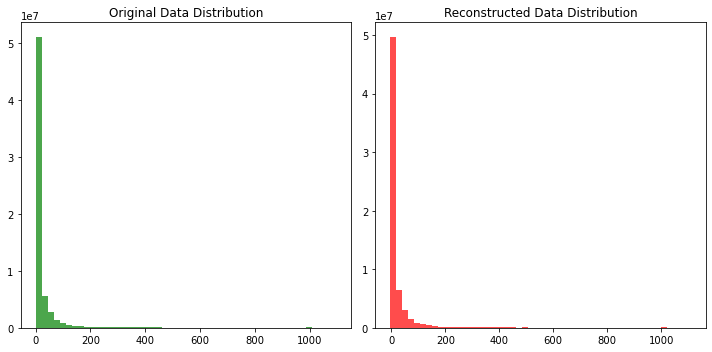

In [ ]:
# Call the functions to visualize the latent space, compare distributions, and output data
original_df, reconstructed_df = compare_and_output_data(vae, data_loader)

In [ ]:
reconstructed_df.to_csv("reconstructed_df.csv")

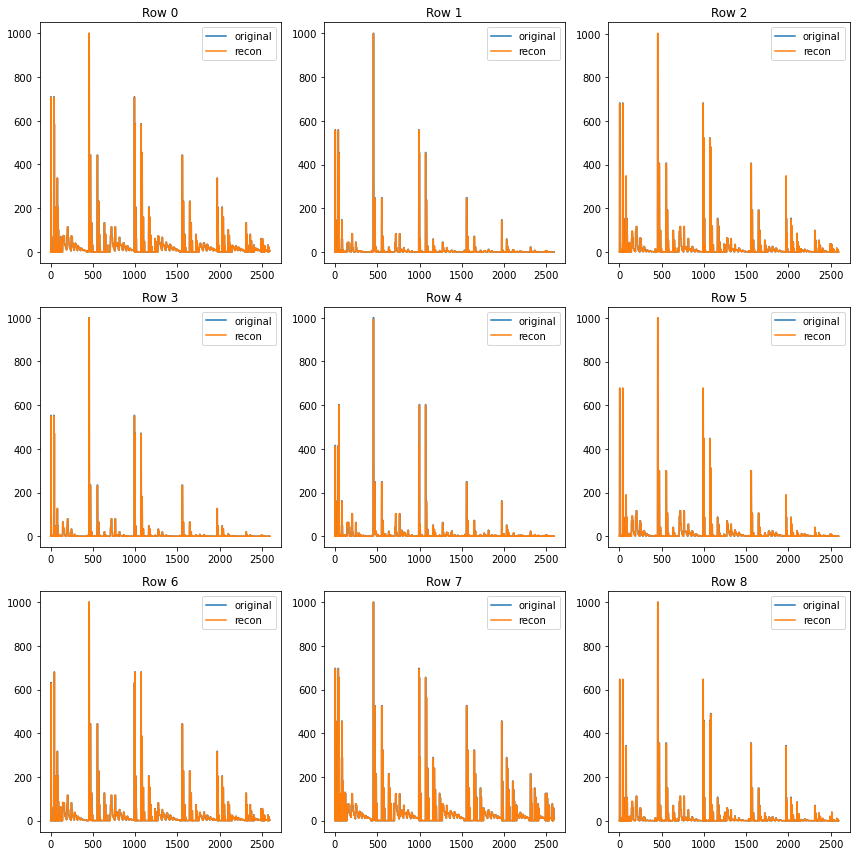

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_1(original_df, reconstructed_df)

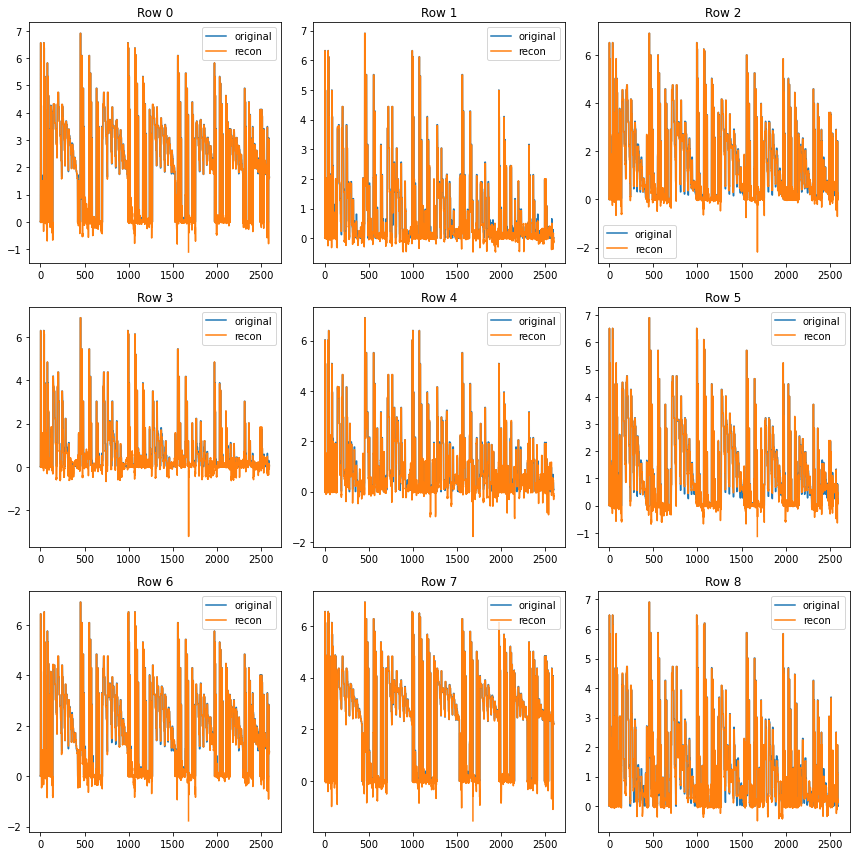

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_1(np.log(original_df+1), np.log(reconstructed_df+1))

In [ ]:
original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595
0,4.807522e-34,4.807522e-34,709.790222,709.790222,4.807522e-34,4.807522e-34,337.850891,337.850891,0.000000e+00,0.000000e+00,...,0.004233,20.745455,20.745455,4.692194,4.692194,4.692194,4.202537,4.202537,4.202537,4.202537
1,1.965151e-31,1.965151e-31,558.888062,558.888062,1.965151e-29,1.965151e-29,147.247238,147.247238,1.504569e-31,1.504569e-31,...,0.039039,0.337684,0.337684,0.004003,0.004003,0.004003,0.015856,0.015856,0.015856,0.015856
2,7.044795e-31,7.044795e-31,682.683838,682.683838,2.815856e-30,2.815856e-30,346.148773,346.148773,1.116858e-32,1.116858e-32,...,0.071867,10.477544,10.477544,0.084504,0.084504,0.084504,0.167663,0.167663,0.167663,0.167663
3,0.000000e+00,0.000000e+00,553.818115,553.818115,7.370892e-30,7.370892e-30,126.511955,126.511955,6.814646e-32,6.814646e-32,...,0.041642,0.335618,0.335618,0.004101,0.004101,0.004101,0.045949,0.045949,0.045949,0.045949
4,0.000000e+00,0.000000e+00,415.922607,415.922607,2.159874e-29,2.159874e-29,162.465195,162.465195,6.000301e-31,6.000301e-31,...,0.989091,0.325290,0.325290,0.435694,0.435694,0.435694,0.085161,0.085161,0.085161,0.085161


In [ ]:
reconstructed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595
0,0.016851,0.003331,707.145508,707.163818,-0.023315,0.024597,337.764648,337.816620,0.001324,0.012328,...,-0.550801,19.919685,19.925920,4.782398,4.843638,4.832738,3.965457,3.981281,3.859052,4.035159
1,0.027481,0.025959,557.328857,557.326904,-0.005890,0.014428,144.906097,144.925079,-0.006237,0.010062,...,-0.309682,0.084711,0.095919,0.145572,0.168610,0.188531,-0.097478,-0.086560,-0.148123,-0.007309
2,0.013908,0.006013,680.001892,679.971558,-0.010103,0.020523,348.366028,348.389252,-0.016000,0.004396,...,-0.506943,10.189377,10.195892,0.275786,0.318598,0.302299,0.072856,0.103598,-0.019831,0.168702
3,0.006261,0.013427,550.967468,550.966187,-0.013251,0.010787,127.926956,127.957306,0.026726,0.023415,...,-0.319394,0.064818,0.064630,0.094050,0.165025,0.144707,-0.023175,-0.012128,-0.116287,0.071310
4,0.033013,0.008109,411.109802,411.098877,-0.033431,-0.002563,159.838959,159.906174,0.007263,0.011530,...,0.723398,0.184410,0.161584,0.524115,0.554116,0.582273,-0.168142,-0.140200,-0.267577,-0.078689


In [ ]:
reconstructed_df = reconstructed_df.transpose()

In [ ]:
reconstructed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,0.016851,0.027481,0.013908,0.006261,0.033013,0.011332,0.026436,0.039194,0.025632,0.028708,...,0.013782,0.021578,0.034478,0.029721,0.030807,0.013844,0.026640,0.028649,0.021757,-0.000450
1,0.003331,0.025959,0.006013,0.013427,0.008109,0.009016,0.027129,0.010356,0.017909,0.022571,...,-0.002288,0.016601,0.006127,0.009311,0.005835,0.016102,0.033566,0.004384,0.004851,0.027951
2,707.145508,557.328857,680.001892,550.967468,411.109802,679.428345,628.309814,694.384766,647.897156,651.647339,...,618.510498,589.575806,656.302734,592.242737,626.559875,520.763672,618.555664,659.266174,588.547546,605.411621
3,707.163818,557.326904,679.971558,550.966187,411.098877,679.472046,628.299072,694.356140,647.913940,651.684082,...,618.563843,589.623474,656.317505,592.366455,626.662842,520.748596,618.577942,659.276245,588.610657,605.440063
4,-0.023315,-0.005890,-0.010103,-0.013251,-0.033431,-0.010084,-0.007149,-0.019014,0.007597,0.000646,...,-0.003206,0.014806,-0.019557,-0.018889,-0.004538,-0.004678,-0.016376,-0.002104,-0.004619,0.003739


In [ ]:
data_orig = pd.read_csv("cleaned_training_df.csv")

In [ ]:
max_values = data_orig.loc[452]

#result = df.multiply(d1.iloc[0], axis=1)

# To recover the original df, invert the normalization:
data_recovered = (reconstructed_df.multiply(max_values.values))/1000

In [ ]:
data_recovered.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,17.544307,1.189754e+02,2.947973e+01,2.881356e+01,1.337077e+02,3.402834e+01,31.174632,35.885410,6.560992e+01,8.462405e+01,...,3.635451e+01,7.667848e+01,5.705620e+01,6.534675e+01,8.983011e+01,4.421763e+01,5.648100e+01,7.783446e+01,1.089039e+02,-3.154556e+00
1,3.467447,1.123848e+02,1.274456e+01,6.179534e+01,3.284314e+01,2.707388e+01,31.991393,9.482142,4.584171e+01,6.653301e+01,...,-6.036477e+00,5.899365e+01,1.013969e+01,2.047050e+01,1.701499e+01,5.142890e+01,7.116349e+01,1.190914e+01,2.428138e+01,1.960882e+02
2,736221.268881,2.412855e+06,1.441308e+06,2.535691e+06,1.665040e+06,2.040175e+06,740931.309196,635766.042782,1.658405e+06,1.920912e+06,...,1.631548e+06,2.095103e+06,1.086097e+06,1.302126e+06,1.826998e+06,1.663256e+06,1.311415e+06,1.791093e+06,2.945985e+06,4.247244e+06
3,736240.332304,2.412847e+06,1.441244e+06,2.535685e+06,1.664996e+06,2.040306e+06,740918.641523,635739.833806,1.658448e+06,1.921020e+06,...,1.631689e+06,2.095272e+06,1.086121e+06,1.302398e+06,1.827299e+06,1.663208e+06,1.311462e+06,1.791121e+06,2.946301e+06,4.247444e+06
4,-24.273596,-2.549768e+01,-2.141394e+01,-6.098473e+01,-1.354009e+02,-3.028086e+01,-8.430120,-17.408436,1.944515e+01,1.903196e+00,...,-8.456724e+00,5.261437e+01,-3.236433e+01,-4.153097e+01,-1.323157e+01,-1.494176e+01,-3.471819e+01,-5.716588e+00,-2.312288e+01,2.623417e+01


In [ ]:
data_orig.head()

,hklf^2_1,hklf^2_10,hklf^2_100,hklf^2_1000,hklf^2_10000,hklf^2_10001,hklf^2_10002,hklf^2_10003,hklf^2_10004,hklf^2_10005,...,hklf^2_9990,hklf^2_9991,hklf^2_9992,hklf^2_9993,hklf^2_9994,hklf^2_9995,hklf^2_9996,hklf^2_9997,hklf^2_9998,hklf^2_9999
0,5.005193e-31,8.507769e-28,1.493190e-27,0.000000e+00,0.000000e+00,0.000000e+00,5.832943e-28,5.482709e-31,1.782625e-30,4.444791e-27,...,2.014956e-30,8.065244e-28,1.199850e-27,0.000000e+00,7.067603e-27,5.105906e-28,2.777678e-28,5.105111e-28,1.342770e-27,8.090890e-27
1,5.005193e-31,8.507769e-28,1.493190e-27,0.000000e+00,0.000000e+00,0.000000e+00,5.832943e-28,5.482709e-31,1.782625e-30,4.444791e-27,...,2.014956e-30,8.065244e-28,1.199850e-27,0.000000e+00,7.067603e-27,5.105906e-28,2.777678e-28,5.105111e-28,1.342770e-27,8.090890e-27
2,7.389748e+05,2.419605e+06,1.446993e+06,2.548810e+06,1.684532e+06,2.031928e+06,7.454746e+05,6.384517e+05,1.655092e+06,1.916591e+06,...,1.634486e+06,2.094725e+06,1.084284e+06,1.309885e+06,1.830220e+06,1.667130e+06,1.313157e+06,1.785104e+06,2.941170e+06,4.227876e+06
3,7.389748e+05,2.419605e+06,1.446993e+06,2.548810e+06,1.684532e+06,2.031928e+06,7.454746e+05,6.384517e+05,1.655092e+06,1.916591e+06,...,1.634486e+06,2.094725e+06,1.084284e+06,1.309885e+06,1.830220e+06,1.667130e+06,1.313157e+06,1.785104e+06,2.941170e+06,4.227876e+06
4,5.005193e-31,8.507769e-26,5.968391e-27,3.392270e-26,8.747726e-26,2.232385e-26,1.311132e-27,8.983419e-27,6.035435e-26,1.493295e-26,...,1.044553e-26,2.430243e-26,2.999743e-26,1.629938e-26,1.335893e-26,2.492159e-26,2.766870e-26,1.033984e-26,8.560292e-26,5.056806e-26


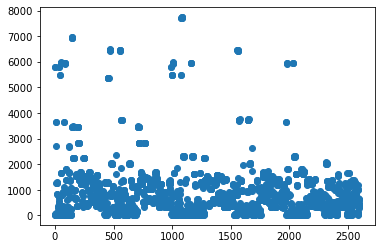

tensor(946.5121, dtype=torch.float64)


In [ ]:
# plot of reconstruction error (MAE)
err2 = np.absolute(data_recovered.values-data_orig.values)
# Convert err2 to a PyTorch tensor
err2 = torch.from_numpy(err2)
# Calculate the mean of err2 along axis 1
mae = torch.mean(err2, dim=1)
plt.scatter(range(len(mae)), mae)
plt.show()
print(torch.mean(mae))

# pcVAE with ABSOLUTE VALUE FUNCTION AS PHYSICAL CONSTRAINT

In [ ]:
# Convert the Pandas DataFrame to a PyTorch tensor
data_tensor = torch.tensor(data.values, dtype=torch.float32)

# Create a TensorDataset using the data tensor
dataset = TensorDataset(data_tensor) # Use TensorDataset directly from torch.utils.data

# Create a DataLoader for the dataset
data_loader = DataLoader(dataset, batch_size=64, shuffle=False) # Use DataLoader directly from torch.utils.data

In [ ]:
# Define the Variational Autoencoder (VAE) architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1000),
            nn.ReLU(),
            nn.Linear(1000, input_dim),
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)  # Clamp to prevent large values
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        decoded = self.decoder(z)
        return torch.abs(decoded)  # Apply absolute value to ensure non-negative outputs

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Define loss function
def loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# Initialize weights with Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

# Function to train the VAE with loss tracking for convergence plot
def train_vae(vae, dataloader, epochs=2000, lr=0.001):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    vae.train()
    loss_history = []  # To store loss for each epoch

    for epoch in range(epochs):
        train_loss = 0
        for batch in dataloader:
            batch_data = batch[0]
            optimizer.zero_grad()
            reconstructed, mu, logvar = vae(batch_data)

            # Calculate the loss
            loss = loss_function(reconstructed, batch_data, mu, logvar)

            # Check for NaN or Inf loss
            if torch.isnan(loss) or torch.isinf(loss):
                print("NaN or Inf loss encountered, stopping training.")
                return

            loss.backward()
            torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)  # Clip gradients
            optimizer.step()
            train_loss += loss.item()

        avg_loss = train_loss / len(dataloader.dataset)
        loss_history.append(avg_loss)  # Append average loss of this epoch
        print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

    # Plot convergence curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Convergence Curve (Epoch vs. Loss)")
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1, Loss: 904043.4290
Epoch 2, Loss: 387011.0932
Epoch 3, Loss: 293087.4436
Epoch 4, Loss: 129744.4565
Epoch 5, Loss: 55997.9456
Epoch 6, Loss: 46729.8035
Epoch 7, Loss: 37705.9626
Epoch 8, Loss: 43199.2461
Epoch 9, Loss: 42588.2559
Epoch 10, Loss: 33481.2106
Epoch 11, Loss: 28657.1731
Epoch 12, Loss: 31255.2940
Epoch 13, Loss: 25241.1154
Epoch 14, Loss: 21333.9795
Epoch 15, Loss: 24023.0929
Epoch 16, Loss: 26197.7032
Epoch 17, Loss: 19519.0963
Epoch 18, Loss: 17699.6856
Epoch 19, Loss: 17793.8241
Epoch 20, Loss: 28073.9912
Epoch 21, Loss: 12680.5048
Epoch 22, Loss: 12555.3604
Epoch 23, Loss: 16087.2631
Epoch 24, Loss: 12916.7814
Epoch 25, Loss: 12505.5428
Epoch 26, Loss: 10887.2432
Epoch 27, Loss: 12755.6954
Epoch 28, Loss: 10879.8699
Epoch 29, Loss: 10968.4311
Epoch 30, Loss: 10313.6031
Epoch 31, Loss: 11464.3086
Epoch 32, Loss: 10013.2229
Epoch 33, Loss: 11376.6722
Epoch 34, Loss: 10692.4868
Epoch 35, Loss: 10694.9431
Epoch 36, Loss: 9432.2253
Epoch 37, Loss: 10452.0041
Epoch 3

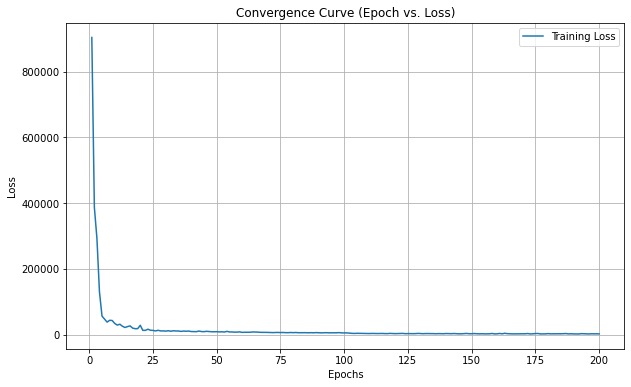

In [ ]:
# initialize VAE
vae = VAE(input_dim=data.shape[1], latent_dim=7)  # Latent dim = 4 from scree plot
vae.apply(init_weights)

# train vae
train_vae(vae, data_loader, epochs=200, lr=0.001)

In [ ]:
torch.save(vae, "vae_full_model1.pth")

In [ ]:
vae = torch.load("vae_full_model1.pth")

<ipython-input-24-264af54197bc>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae = torch.load("vae_full_model1.pth")


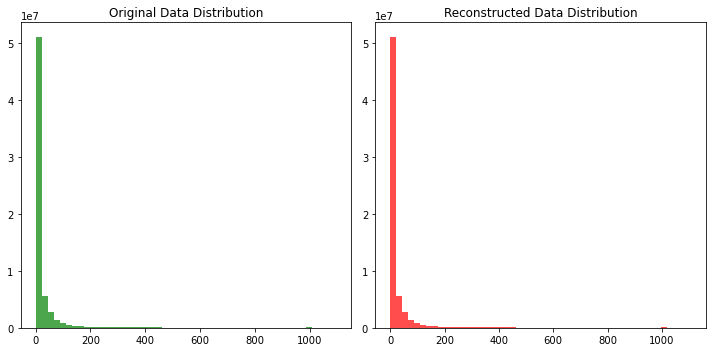

In [ ]:
# Call the functions to visualize the latent space, compare distributions, and output data
original_df, reconstructed_df = compare_and_output_data(vae, data_loader)

In [ ]:
reconstructed_df.to_csv("reconstructed_df.csv")

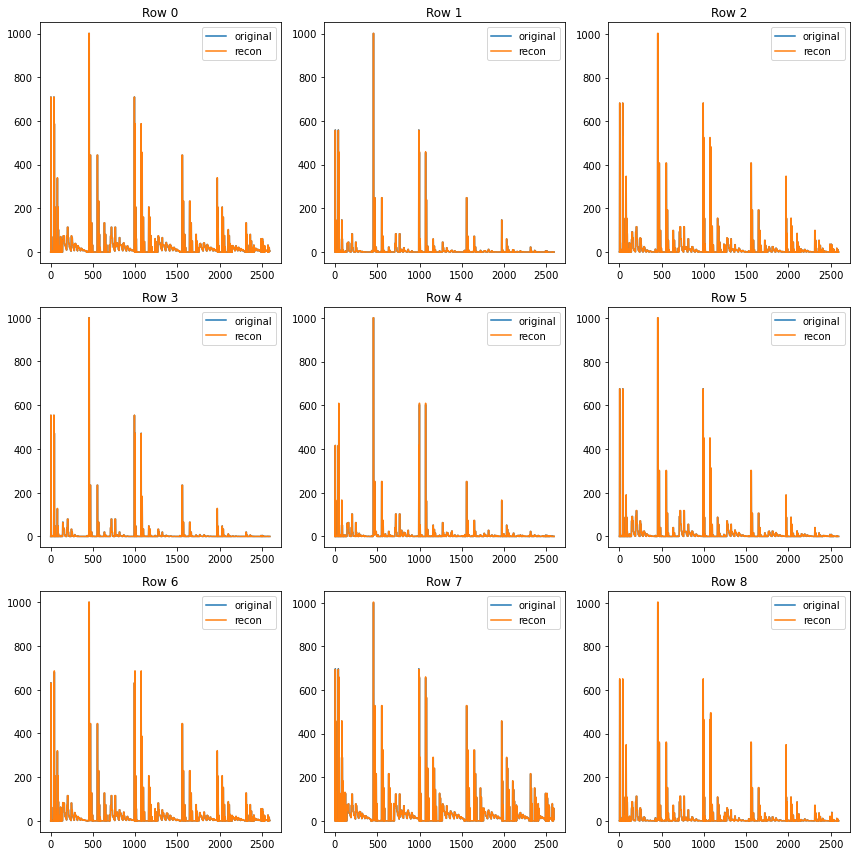

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_1(original_df, reconstructed_df)

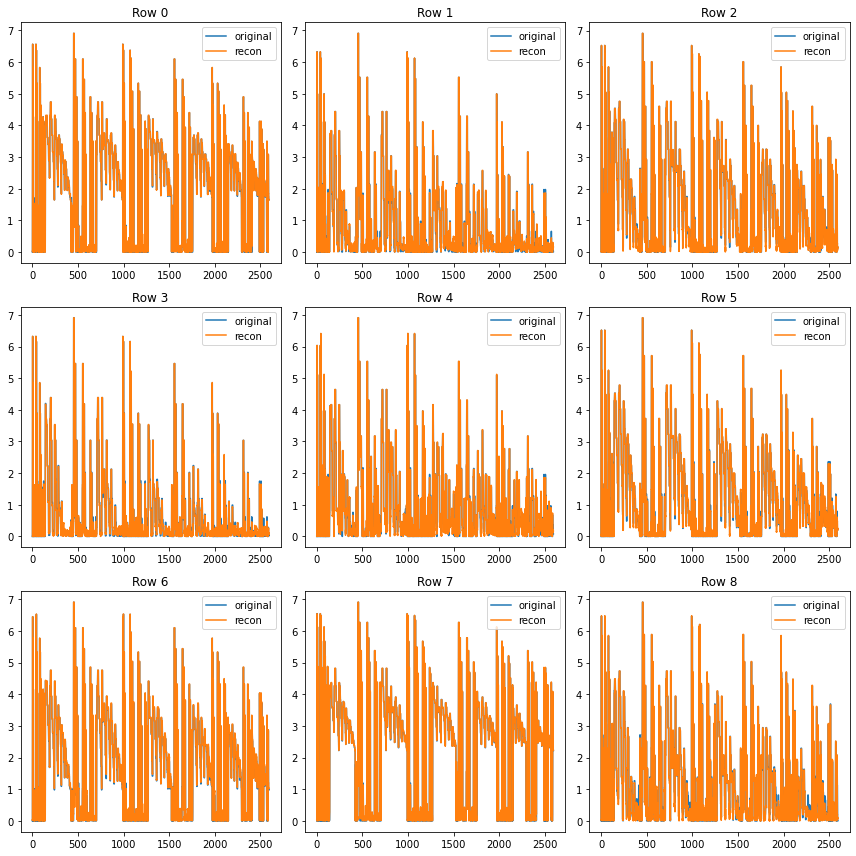

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_1(np.log(original_df+1), np.log(reconstructed_df+1))

# VAE without scale invariance

In [ ]:
data2 = pd.read_csv("cleaned_training_df.csv")

In [ ]:
data2 = data2.transpose()

In [ ]:
# Convert the Pandas DataFrame to a PyTorch tensor
data_tensor2 = torch.tensor(data2.values, dtype=torch.float32)

# Create a TensorDataset using the data tensor
dataset2 = TensorDataset(data_tensor2) # Use TensorDataset directly from torch.utils.data

# Create a DataLoader for the dataset
data_loader2 = DataLoader(dataset2, batch_size=64, shuffle=False) # Use DataLoader directly from torch.utils.data

In [ ]:
# Define the Variational Autoencoder (VAE) architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1000),
            nn.ReLU(),
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1000),
            nn.ReLU(),
            nn.Linear(1000, input_dim),
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)  # Clamp to prevent large values
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        decoded = self.decoder(z)
        return torch.abs(decoded)  # Apply absolute value to ensure non-negative outputs

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Define loss function
def loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# Initialize weights with Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

# Function to train the VAE with loss tracking for convergence plot
def train_vae2(vae, dataloader, epochs=2000, lr=0.001):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    vae.train()
    loss_history = []  # To store loss for each epoch

    for epoch in range(epochs):
        train_loss = 0
        for batch in dataloader:
            batch_data = batch[0]
            optimizer.zero_grad()
            reconstructed, mu, logvar = vae(batch_data)

            # Calculate the loss
            loss = loss_function(reconstructed, batch_data, mu, logvar)

            # Check for NaN or Inf loss
            if torch.isnan(loss) or torch.isinf(loss):
                print("NaN or Inf loss encountered, stopping training.")
                return

            loss.backward()
            torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)  # Clip gradients
            optimizer.step()
            train_loss += loss.item()

        avg_loss = train_loss / len(dataloader.dataset)
        loss_history.append(avg_loss)  # Append average loss of this epoch
        print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

    # Plot convergence curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Convergence Curve (Epoch vs. Loss)")
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1, Loss: 5130542369514.4551
Epoch 2, Loss: 532616503078.4205
Epoch 3, Loss: 471651205219.6147
Epoch 4, Loss: 275996463647.9488
Epoch 5, Loss: 296051517318.7584
Epoch 6, Loss: 252723630125.8752
Epoch 7, Loss: 223367842769.1418
Epoch 8, Loss: 306665648186.9824
Epoch 9, Loss: 175799951740.1088
Epoch 10, Loss: 202401258122.7725
Epoch 11, Loss: 141546202385.6128
Epoch 12, Loss: 144261346135.9001
Epoch 13, Loss: 168615809604.6490
Epoch 14, Loss: 205899479268.7206
Epoch 15, Loss: 166764461487.5546
Epoch 16, Loss: 138199119282.8314
Epoch 17, Loss: 119329005670.2362
Epoch 18, Loss: 86038804944.6502
Epoch 19, Loss: 94290458517.1763
Epoch 20, Loss: 120993479571.5379
Epoch 21, Loss: 73175758819.8195
Epoch 22, Loss: 88085658237.6653
Epoch 23, Loss: 84148554584.5555
Epoch 24, Loss: 73585734031.7696
Epoch 25, Loss: 107626225981.1942
Epoch 26, Loss: 77436647112.7040
Epoch 27, Loss: 94556218888.0282
Epoch 28, Loss: 129549742469.2838
Epoch 29, Loss: 91032844071.0758
Epoch 30, Loss: 80621020417.884

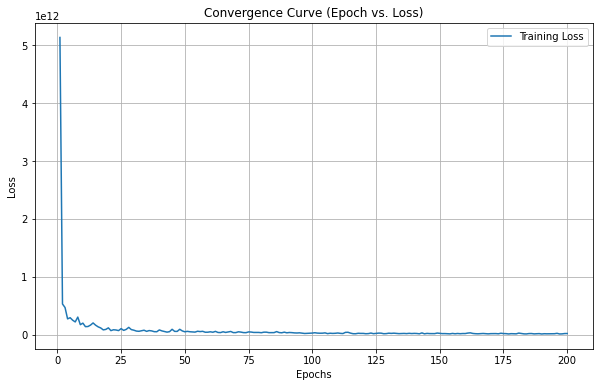

In [ ]:
# initialize VAE
vae2 = VAE(input_dim=data2.shape[1], latent_dim=7)  # Latent dim = 4 from scree plot
vae2.apply(init_weights)

# train vae
train_vae2(vae2, data_loader2, epochs=200, lr=0.001)

In [ ]:
# function to plot the first 9 rows of ant df
def plot_9_rows2(data):
    # Create a 3x3 subplot
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    # Loop through the first 9 rows and plot each on a different subplot
    for i, ax in enumerate(axes.flat):
        row_data = data.iloc[i, :]  # Select the i-th row from the dataframe
        ax.plot(row_data)  # Plot the data
        ax.set_title(f'Row {i}')  # Set a title indicating the row number
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot both original and reconstructed dataset together
def plot_9_rows_12(original_df, reconstructed_df):
    # Create a 3x3 subplot
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    # Loop through the first 9 rows and plot each on a different subplot
    for i, ax in enumerate(axes.flat):
        row_data_1 = original_df.iloc[i, :]  # Select the i-th row from the dataframe
        row_data_2 = reconstructed_df.iloc[i, :]  # Select the i-th row from the dataframe
        ax.plot(row_data_1, label="original")  # Plot the data
        ax.plot(row_data_2, label="recon")
        ax.legend(loc="best") # Plot the data
        ax.set_title(f'Row {i}')  # Set a title indicating the row number
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

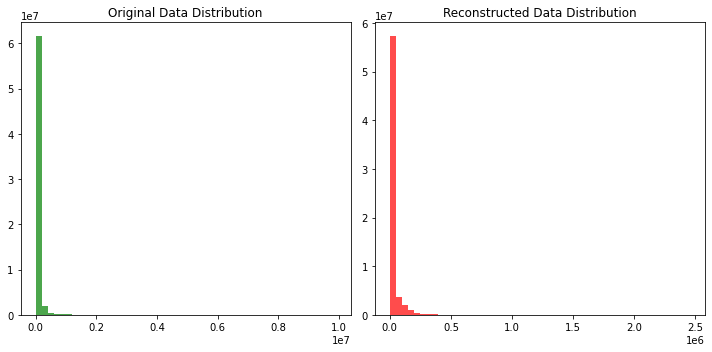

In [ ]:
# Call the functions to visualize the latent space, compare distributions, and output data
original_df2, reconstructed_df2 = compare_and_output_data2(vae2, data_loader2)

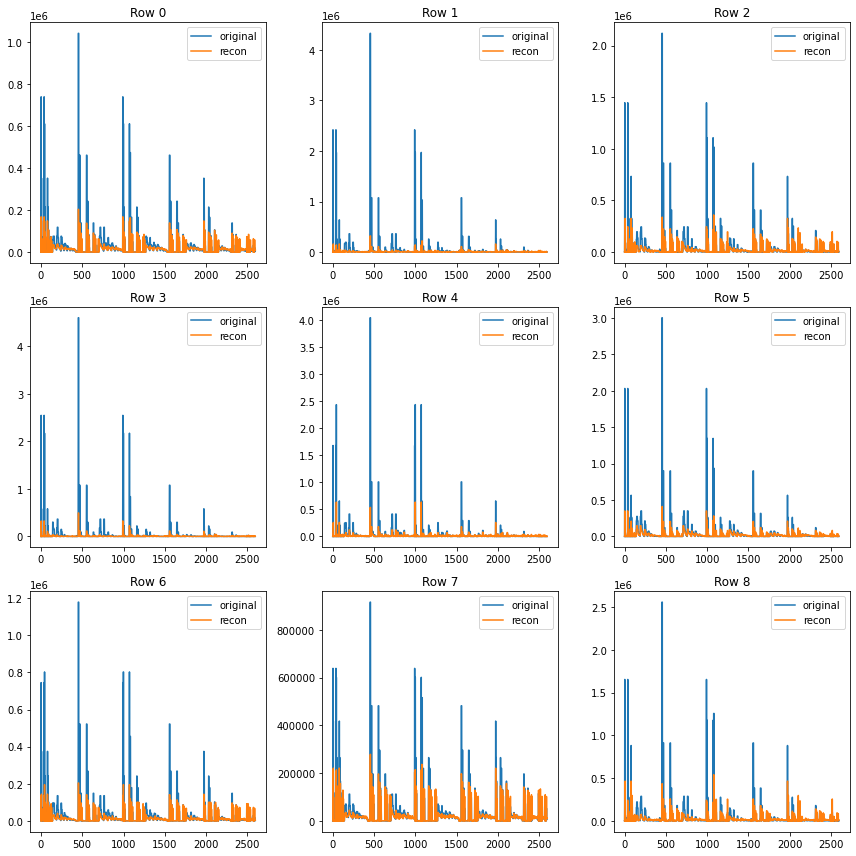

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_12(original_df2, reconstructed_df2)

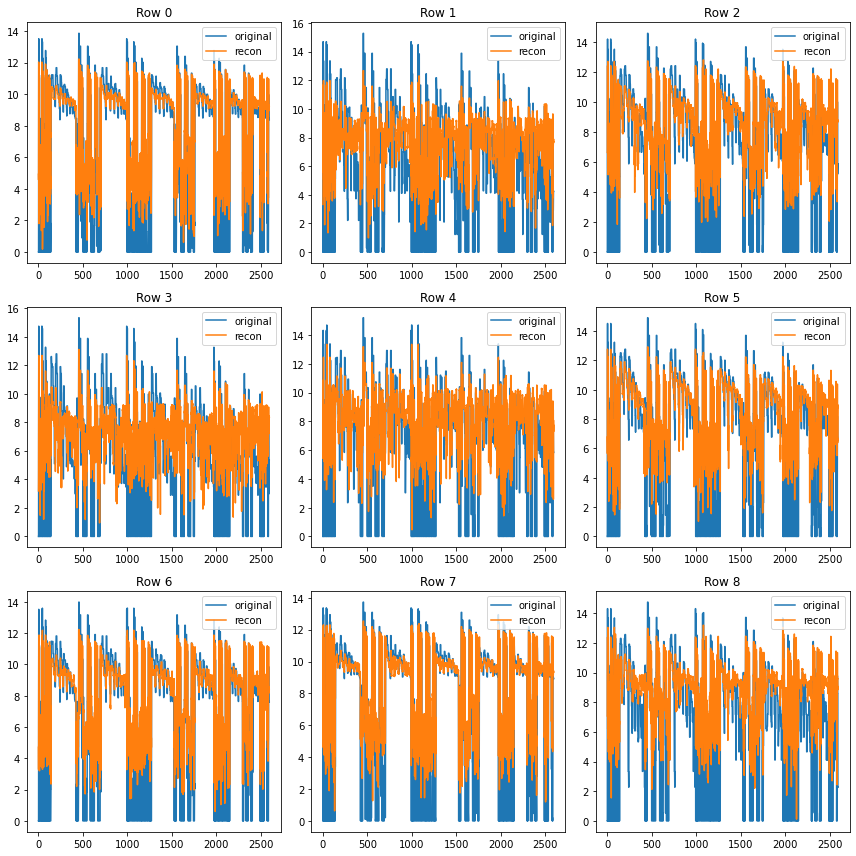

In [ ]:
# plot of the log of the first 9 rows of original and reconstructed data together
plot_9_rows_12(np.log(original_df2+1), np.log(reconstructed_df2+1))

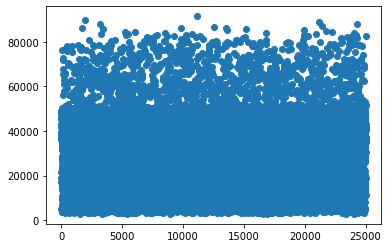

tensor(34479.9609)


In [ ]:
# plot of reconstruction error (MAE)
err2 = np.absolute(original_df2.values-reconstructed_df2.values)
# Convert err2 to a PyTorch tensor
err2 = torch.from_numpy(err2)
# Calculate the mean of err2 along axis 1
mae = torch.mean(err2, dim=1)
plt.scatter(range(len(mae)), mae)
plt.show()
print(torch.mean(mae))